<a href="https://colab.research.google.com/github/ShouqAbdulrahim/Machine-learning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Task 1: Data Preparation

In [ ]:
# 1. Load the Diamonds dataset using the sns.load_dataset function from the seaborn library.
df = sns.load_dataset('diamonds')


# 2. Extract features and target columns into X and y, respectively.
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

# 3. Encode categorical features using one-hot encoding.
X = pd.get_dummies(X, drop_first=True)

# 4. Normalize all feature values using standardization.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Normalize target variable
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.to_numpy().reshape(-1, 1)).flatten()


# 5. Split dataset into training (80%), validation (10%), and testing (10%) sets.
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Task 2: Neural Network Implementation

In [ ]:
#1. Build a two-layer feedforward neural network with:
def build_model(learning_rate):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(5, activation='relu'),
        Dropout(0.2),  # Prevent overfitting
        Dense(1)  # Single output node for regression
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model



# Task 3: Model Training

Training model with learning rate = 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with learning rate = 0.3


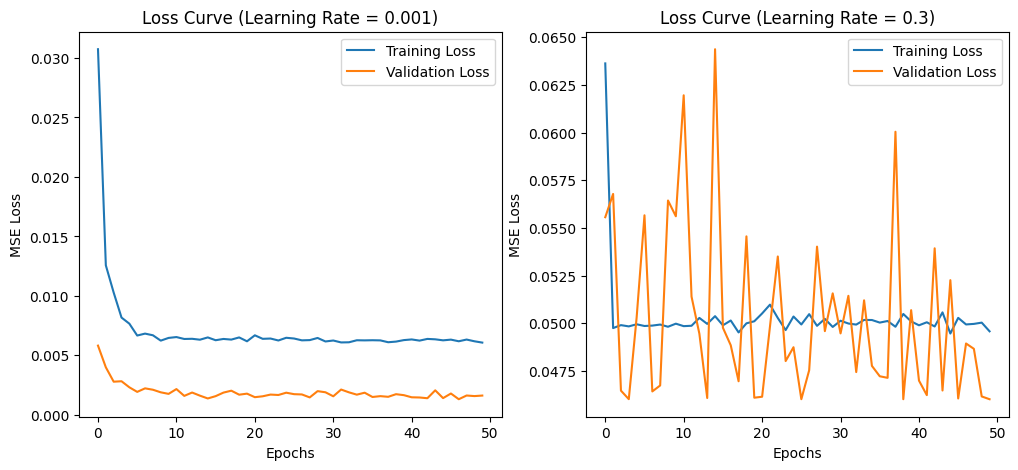

In [ ]:
#1. Train the network using the Adam optimizer with an initial learning rate of 0.001, MSE loss, 50 epochs and batch size of 32.

print("Training model with learning rate = 0.001")
model_001 = build_model(0.001)
history_001 = model_001.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

print("Training model with learning rate = 0.3")
model_03 = build_model(0.3)
history_03 = model_03.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)


#2. Plot the loss curve (training and validation loss).
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_001.history['loss'], label='Training Loss')
plt.plot(history_001.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss Curve (Learning Rate = 0.001)')


#3. Repeat the training using a learning rate of 0.3 and plot the loss curve. What can you observe? Explain how different learning rates (e.g., 0.001 vs. 0.3) affect convergence.


plt.subplot(1, 2, 2)
plt.plot(history_03.history['loss'], label='Training Loss')
plt.plot(history_03.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss Curve (Learning Rate = 0.3)')
plt.show()


### Repeat the training using a learning rate of 0.3 and plot the loss curve.
### **What can you observe? Explain how different learning rates (e.g., 0.001 vs. 0.3) affect convergence.**

A low learning rate (0.001) leads to stable and gradual convergence, improving accuracy. A high learning rate (0.3) causes unstable training, large fluctuations, and poor convergence, leading to inaccurate predictions and higher errors.

# Task 4: Performance Evaluation

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predictions vs. Ground Truth (Learning Rate = 0.001)
Mean Squared Error (MSE): 585104.32
Mean Absolute Error (MAE): 456.63
R² Score: 0.9635


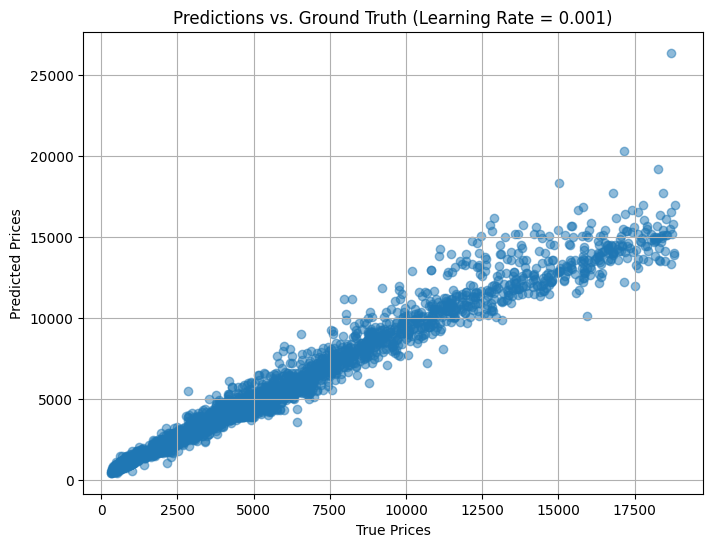

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Predictions vs. Ground Truth (Learning Rate = 0.3)
Mean Squared Error (MSE): 16050667.74
Mean Absolute Error (MAE): 3012.76
R² Score: -0.0002


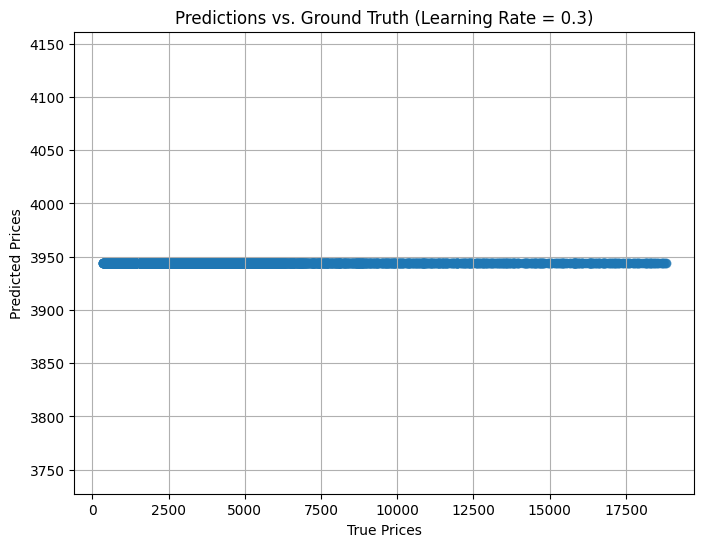

In [ ]:
#1. Evaluate the model on the test set using the following metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE) and R2 Score
def evaluate_model(model, title):
    y_pred = model.predict(X_test)
    y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test_original, y_pred)
    mae = mean_absolute_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)

    print(f"\n{title}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    #2. Visualize a scatter plot comparing true labels and predicted values. Describe your insights from the plot.

    plt.figure(figsize=(8, 6))  # Set figure size
    plt.scatter(y_test_original, y_pred, alpha=0.5)
    plt.xlabel('True Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.grid(True)  # Add grid for better visualization
    plt.show()
# Evaluate both models
evaluate_model(model_001, 'Predictions vs. Ground Truth (Learning Rate = 0.001)')
evaluate_model(model_03, 'Predictions vs. Ground Truth (Learning Rate = 0.3)')